<a href="https://colab.research.google.com/github/YashC1308/QSTP-MachineLearning/blob/main/QSTP_Logistic_regression_A_1_YC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.core.fromnumeric import shape
from sklearn.preprocessing import MinMaxScaler


In [141]:

df = pd.read_csv('QSTP_LogReg.csv')


features = ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']
X = df.loc[:, features]
y = df.loc[:, ['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

norm = MinMaxScaler().fit(y_train)
y_train_norm = norm.transform(y_train)
y_test_norm = norm.transform(y_test)

print(X_train_norm.shape)
print(y_train_norm.shape)

print(type(X_train_norm))

(546, 9)
(546, 1)
<class 'numpy.ndarray'>


In [142]:
def sigmoid(x):
    return float(1.0 / float((1.0 + np.exp(-1.0*x))))

In [143]:
def predict():
    predicted_y=[]
    
    for x in X_train_norm:
        logit = np.dot(W,x)
        predicted_y.append(sigmoid(logit)) 
        
    return np.array(predicted_y)

In [144]:
def cost_function(predicted_y,y): #the cost function mentioned above
    error = []
    for i in range(len(predicted_y)):
      error_element=(-y[i]*np.log(predicted_y[i])) - ((1-y[i])*np.log(1-predicted_y[i]))
      error.append(error_element)

    error = np.asarray(error)
    cf=(1/X_train_norm.shape[0])*sum(error)
    
    return cf,error

In [145]:
def gradient_descent(lrate,epochs): 
    
    total_expected_error=float("inf")
    errorlist=[]
    finalepoch=0
    
    for epoch in range(epochs):
        global W
        
        predictedY=predict() 
        total_error,error = cost_function(predictedY,y_train_norm)
        gradient=np.dot(X_train_norm.T,error)/X_train_norm.shape[0]
        
        if epoch%10==0:
            errorlist.append(total_error)
            finalepoch+=1
        
        if (total_expected_error<total_error):
            return errorlist,finalepoch
            
        total_expected_error=total_error
        
        
        for (i,w) in enumerate(gradient):
            W[i]+=float(-lrate)*w
            
    return errorlist,finalepoch     

[0.95018753 0.05055896 0.03208226 0.30751583 0.53158638 0.38771356
 0.97620098 0.17433149 0.99441183]

[array([0.6579606]), array([0.65778427]), array([0.65760849]), array([0.65743327]), array([0.65725861]), array([0.65708451]), array([0.65691097]), array([0.656738]), array([0.65656558]), array([0.65639374]), array([0.65622247]), array([0.65605176]), array([0.65588163]), array([0.65571207]), array([0.65554309]), array([0.65537468]), array([0.65520685]), array([0.65503961]), array([0.65487295]), array([0.65470687]), array([0.65454138]), array([0.65437647]), array([0.65421216]), array([0.65404844]), array([0.65388532]), array([0.65372279]), array([0.65356086]), array([0.65339953]), array([0.6532388]), array([0.65307868]), array([0.65291916]), array([0.65276025]), array([0.65260195]), array([0.65244426]), array([0.65228719]), array([0.65213074]), array([0.6519749]), array([0.65181969]), array([0.6516651]), array([0.65151114]), array([0.6513578]), array([0.65120509]), array([0.65105302]), 

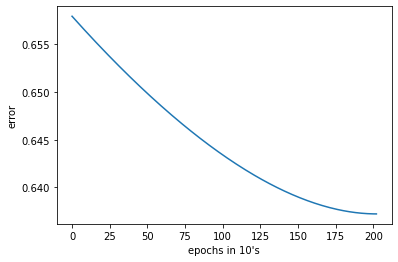

In [178]:
W=np.random.uniform(size=X_train_norm.shape[1])
print(W)
print()
total_error,finalepoch=gradient_descent(0.001,5000)

print(total_error)
print(finalepoch)
#plotting 
plt.plot(range(finalepoch),total_error)
plt.xlabel("epochs in 10's")
plt.ylabel("error")
plt.show()

In [179]:
W

array([ 0.5869903 , -0.06819397, -0.1023921 ,  0.20066326,  0.33307745,
        0.25012731,  0.75729924,  0.0717376 ,  0.97085835])

In [180]:
yhat = np.dot(X_test_norm,W)

#if the score is above 0.5 lets make it 1 else make it 0
for i,v in enumerate(yhat):
    if v >=0.56: 
        yhat[i]=1
    else:
        yhat[i]=0

yhat.astype(int)

yhat = yhat.reshape(-1,1)



In [181]:
#error and acuracy 
error=sum((yhat-y_test_norm)**2)
print(error[0])
accuracy=1-(error/100)
print(accuracy[0])   

5.0
0.95


In [182]:
#confusion matrix creation
confusion_m =[[0,0],[0,0]]

#               Actual Yes         Actual No
#Predicted YES      a00               a01
#Predicted NO       a10               a11   

for i in range(len(yhat)):
  if(yhat[i] == y_test_norm[i] and yhat[i]==1):
    confusion_m[0][0]+=1
  elif(yhat[i] == y_test_norm[i] and yhat[i]==0):
    confusion_m[1][1]+=1
  elif(yhat[i]==1 and y_test_norm[i]==0):
    confusion_m[0][1]+=1
  elif(yhat[i]==0 and y_test_norm[i]==1):
    confusion_m[1][0]+=1

print(confusion_m)

[[50, 5], [0, 82]]
